# Pytorch

### Czym jest PyTorch?
PyTorch to platforma uczenia maszynowego i głębokiego uczenia o otwartym kodzie źródłowym z zaimplementowaną akceleracją GPU.

### Do czego można wykorzystać PyTorch?
PyTorch umożliwia manipulowanie i przetwarzanie danych oraz pisanie algorytmów uczenia maszynowego przy użyciu kodu Python.

### Kto używa PyTorch?
Wiele największych na świecie firm technologicznych, takich jak Meta (Facebook), Tesla i Microsoft, a także firmy zajmujące się badaniami nad sztuczną inteligencją, takie jak OpenAI, używają PyTorch do prowadzenia badań i wprowadzania uczenia maszynowego do swoich produktów.

# Najważniejsze ogniwo czyli Tensor

In [118]:
# ! pip install torch

In [119]:
tensor = torch.tensor(
    [[[1.0, 2.0], [3.0, 4.0], [2.0, 6.0]], [[5.0, 6.0], [7.0, 8.0], [3.0, 4.0]]]
)
print(tensor)

In [120]:
tensor.size()

<img src="https://camo.githubusercontent.com/ee448915343934a7ed9db47a6a0853c5374be0d443c0dba9e0eb0cc9da84c4f7/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f7079746f7263682d646565702d6c6561726e696e672f6d61696e2f696d616765732f30302d7079746f7263682d646966666572656e742d74656e736f722d64696d656e73696f6e732e706e67" alt="opis" style="width: 80%;"/>

In [121]:
import numpy as np
import time

# Rozmiar tensorów/tablic
size = (1000, 1000)

# Tworzenie tensorów i tablic
tensor_a = torch.rand(size)
tensor_b = torch.rand(size)


# Mierzenie czasu dla PyTorch
start_time = time.time()
for _ in range(1000):
    tensor_result = torch.matmul(tensor_a, tensor_b)
torch_time = time.time() - start_time


print(f"PyTorch: {torch_time:.5f} s")

In [122]:
array_a = np.random.rand(*size)
array_b = np.random.rand(*size)

start_time = time.time()
for _ in range(1000):
    array_result = np.dot(array_a, array_b)
numpy_time = time.time() - start_time

print(f"NumPy: {numpy_time:.5f} s")

In [123]:
#chck divice and coment
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU aktywne")
else:
    device = torch.device("cpu")
    print("GPU nieaktywne")

In [124]:
tensor_a = torch.rand(size).to(device)
tensor_b = torch.rand(size).to(device)


# Mierzenie czasu dla PyTorch
start_time = time.time()
for _ in range(1000):
    tensor_result = torch.matmul(tensor_a, tensor_b).to(device)
torch_time = time.time() - start_time

print(f"PyTorch on GPU: {torch_time:.5f} s")

# x10 więcej obliczeń


In [125]:
# Mierzenie czasu dla PyTorch
start_time = time.time()
for _ in range(10000):
    tensor_result = torch.matmul(tensor_a, tensor_b).to(device)
torch_time = time.time() - start_time

print(f"PyTorch on GPU: {torch_time:.5f} s")

# Tworzenie i ucznie pierwszego modelu

Aby lepiej zrozumieć na czym polega projektowanie sieci neuronowych polecam wypróbować playground od tensorflow. Zadanie osoągnąć jak najniższy `Test loss`
https://playground.tensorflow.org

![Screenshot from 2024-03-25 21-43-16.png](<attachment:Screenshot from 2024-03-25 21-43-16.png>)
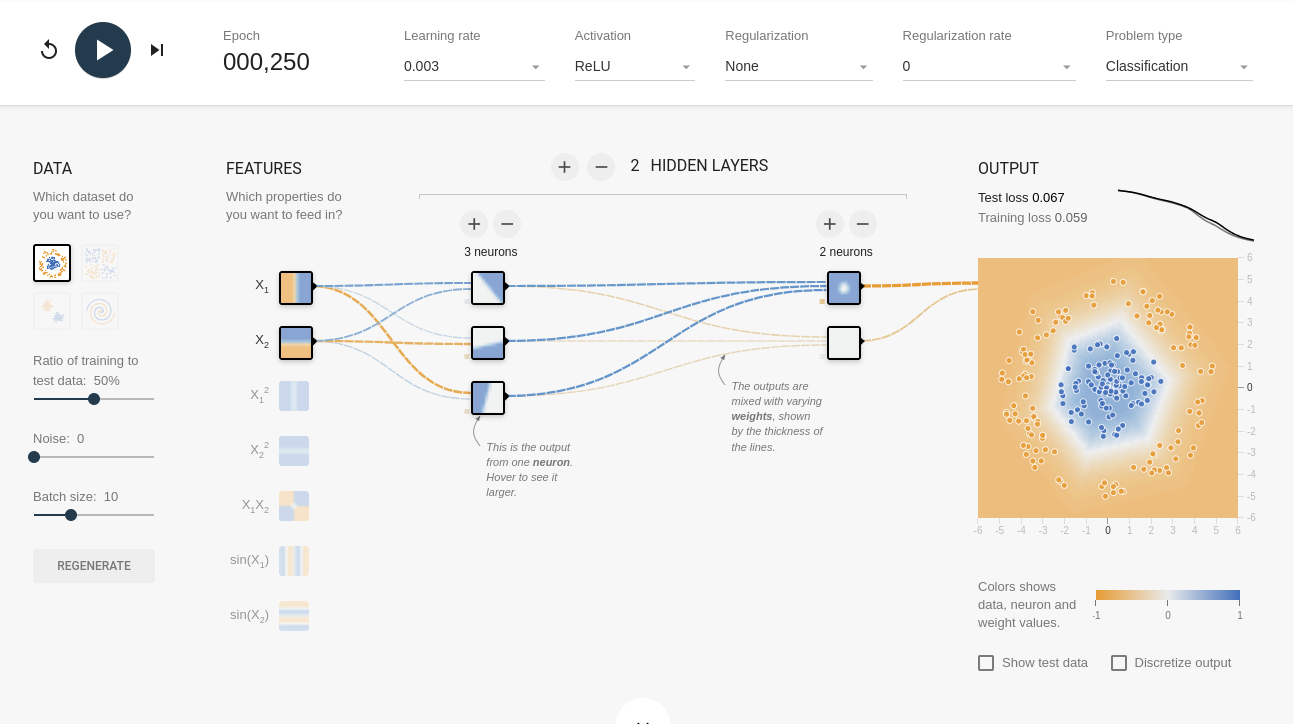

## Przygotowanie danych


In [126]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [127]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

In [128]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [129]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

In [130]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

In [131]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

# Projektowanie archtektury modelu

In [132]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

In [133]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

In [134]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

# Uczenie modelu

In [135]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

In [203]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
     
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        x = self.layer_1(self.relu(x))
        x = self.layer_2(self.relu(x))
        x = self.layer_3(self.relu(x))
        return x

# 4. Create an instance of the model and send it to target device
model_1 = CircleModelV1().to(device)
model_1

In [204]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [205]:
# Fit the model
torch.manual_seed(42)
epochs = 10000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

In [206]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [207]:
# Make predictions
model_1.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

In [208]:
from helper_functions import plot_decision_boundary
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) # model_3 = has non-linearity